# Overlays

Overlays are useful to display extra information on top of a given driving scene. They can be use to display the ID of the vehicle, their speed, or any useful information. 

In [1]:
using AutomotiveDrivingModels
using AutoViz

┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.1\AutomotiveDrivingModels\ZEfHM.ji for AutomotiveDrivingModels [99497e54-f3d6-53d3-a3a9-fa9315a7f1ba]
└ @ Base loading.jl:1184
┌ Warning: Package AutomotiveDrivingModels does not have StaticArrays in its dependencies:
│ - If you have AutomotiveDrivingModels checked out for development and have
│   added StaticArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with AutomotiveDrivingModels
└ Loading StaticArrays into AutomotiveDrivingModels from project dependency, future warnings for AutomotiveDrivingModels are suppressed.
┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.1\AutoViz\w0rHu.ji for AutoViz [82aa6e0c-a491-5edf-8d4b-c16b98e4ea17]
└ @ Base loading.jl:1184


For this tutorial, we will use a simple driving scene with two lanes on a straight roadway and three vehicles.

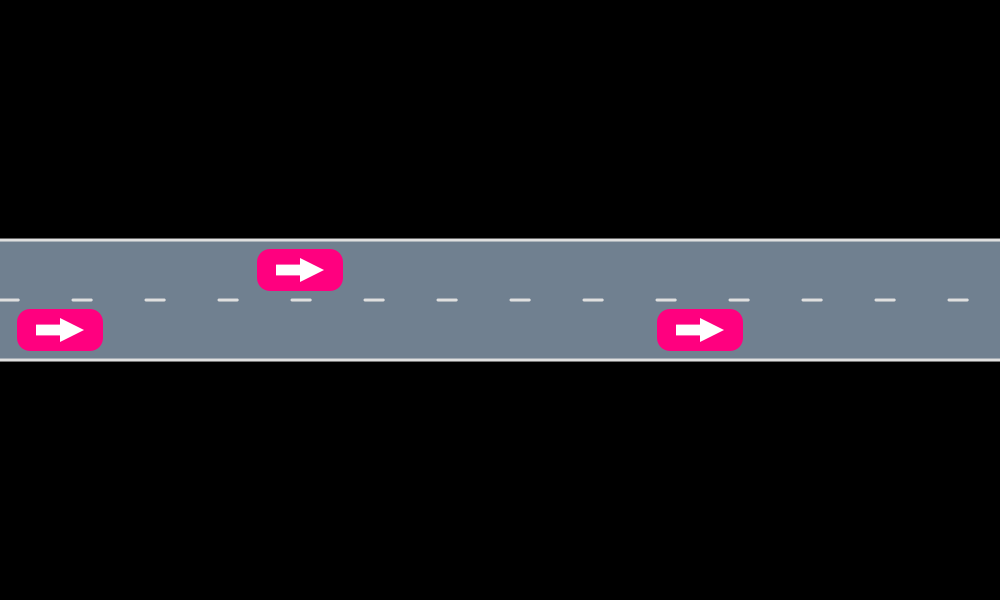

In [2]:
roadway = gen_straight_roadway(2, 50.0) # 2 lanes 50m
scene = Scene()
state1 = VehicleState(Frenet(roadway[LaneTag(1,1)],3.0), roadway, 10.0)
veh1 = Vehicle(state1, VehicleDef(), 1)
state2 = VehicleState(Frenet(roadway[LaneTag(1,1)],35.0), roadway, 10.0)
veh2 = Vehicle(state2, VehicleDef(), 2)
state3 = VehicleState(Frenet(roadway[LaneTag(1,2)],15.0), roadway, 10.0)
veh3 = Vehicle(state3, VehicleDef(), 3)
push!(scene, veh1)
push!(scene, veh2)
push!(scene, veh3)
render(scene, roadway, cam=FitToContentCamera(0.))

Overlays can be passed to the render function as an optional argument. This argument should be a list of overlays:
`render(scene, roadway, overlays::Vector{SceneOverlay} = SceneOverlay[])`


Below we demonstrate the default overlay implemented in this package

## TextOverlay

The `TextOverlay` display some text at the desired location. The coordinates and size units are in pixels by default. The option `incameraframe` allow to use the scene units.

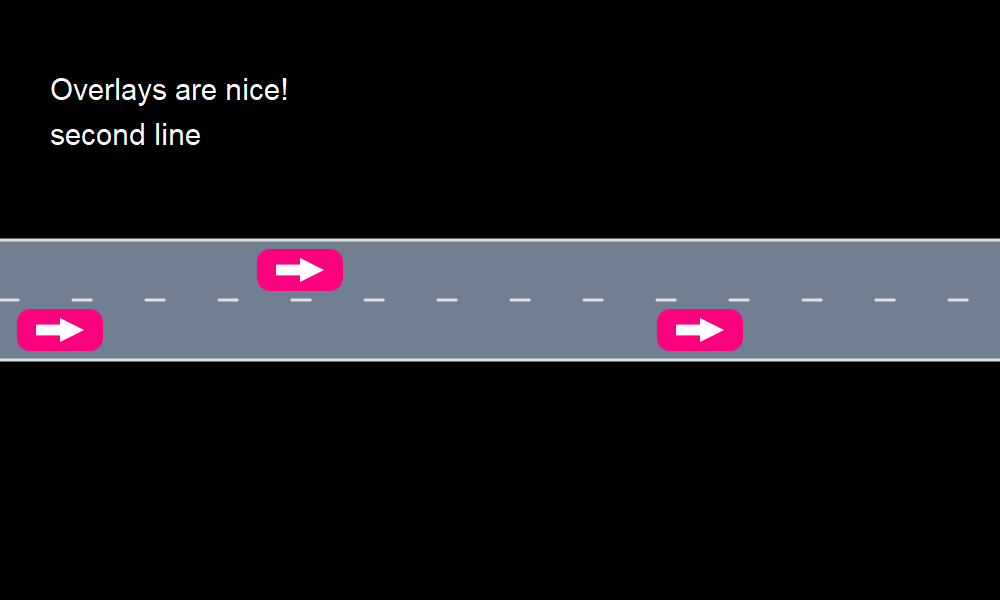

In [3]:
text_overlay = TextOverlay(text=["Overlays are nice!", "second line"], font_size=30, pos = VecE2(50.0, 100.0))
render(scene, roadway, [text_overlay], cam=FitToContentCamera(0.))

## IDOverlay

The ID Overlay displays the ID of each vehicle present in the scene on top of them.

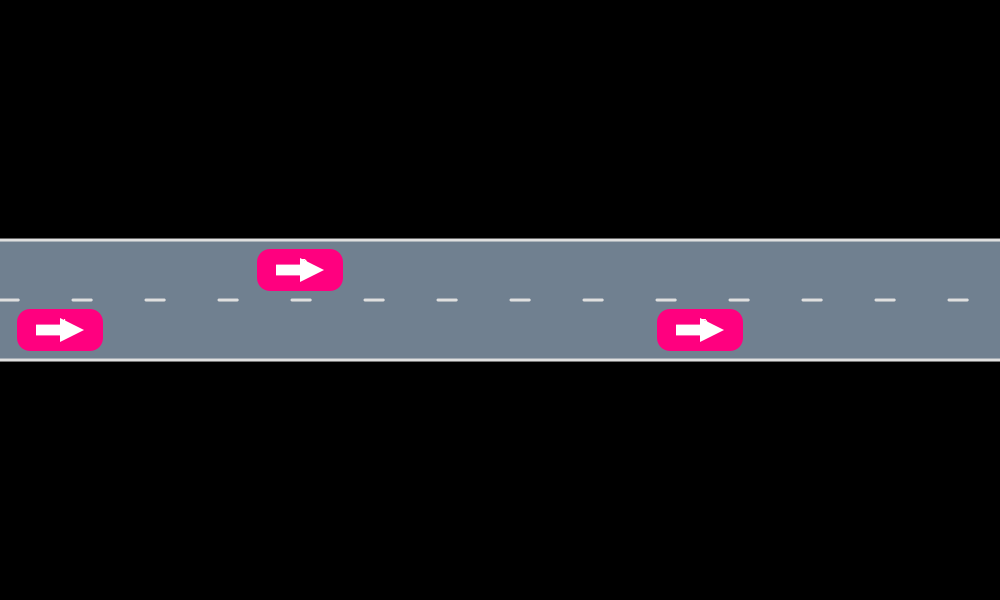

In [4]:
render(scene, roadway, [IDOverlay()], cam=FitToContentCamera(0.0))

## HistogramOverlay

Display a bar at the specified position `pos`, the bar is of size `width`, `height` and is filled up to a given proportion of its height. 
The fill proportion is set using `val`, it should be a number between 0 and 1. If it is 0, the bar is not filled, if it is 1 it is filled to the top.
The default units are in the camera frame.

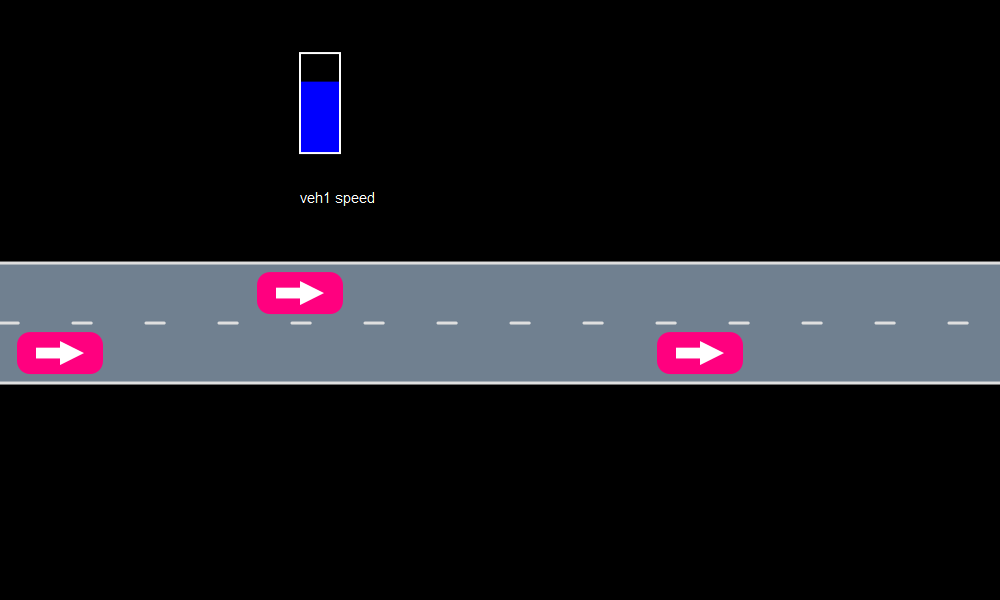

In [5]:
max_speed = 14.0
histogram_overlay = HistogramOverlay(pos = VecE2(15.0, 10.0), val=veh1.state.v/max_speed, label="veh1 speed")
render(scene, roadway, [histogram_overlay], cam=FitToContentCamera(0.))

## NeighborsOverlay


In [6]:
neighbors_overlay = NeighborsOverlay(3)
render(scene, roadway, [neighbors_overlay], cam=FitToContentCamera(0.))

MethodError: MethodError: no method matching getindex(::Frame{Entity{VehicleState,VehicleDef,Int64}}, ::Nothing)
Closest candidates are:
  getindex(::Frame, !Matched::Int64) at C:\Users\Maxime\.julia\packages\Records\EOEz0\src\frames.jl:20

## CarFollowingStatsOverlay

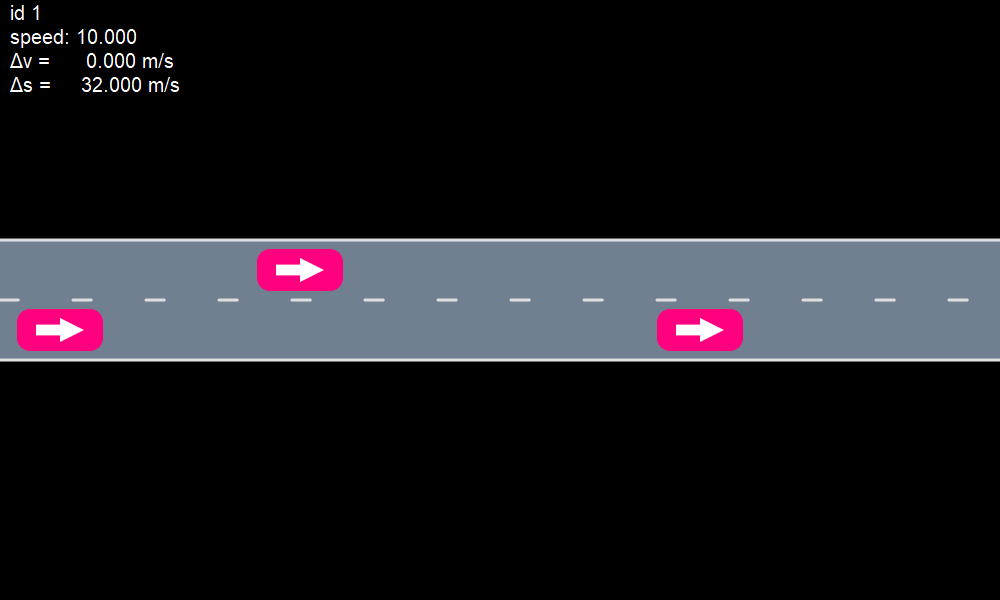

In [7]:
follow_overlay = CarFollowingStatsOverlay(1, font_size=20)
render(scene, roadway, [follow_overlay], cam=FitToContentCamera(0.))

## Implementing your own overlay

To implement your own overlay you should define a custom overlay type that is a subtype of the abstract type `SceneOverlay`. Then you should define the `render!` function. The `render!` function should add instruction to the `rendermodel` object. To learn more about the `rendermodel` look at the rendermodel tutorial [TODO].

As an example we show an overlay that highlights a lane.

In [8]:
struct LaneOverlay <: SceneOverlay
    lane::Lane
    color::Colorant
end

function AutoViz.render!(rendermodel::RenderModel, overlay::LaneOverlay, scene::Scene, roadway::Roadway)
    render!(rendermodel, overlay.lane, roadway, color_asphalt=overlay.color) # this display a lane with the specified color
    return rendermodel
end


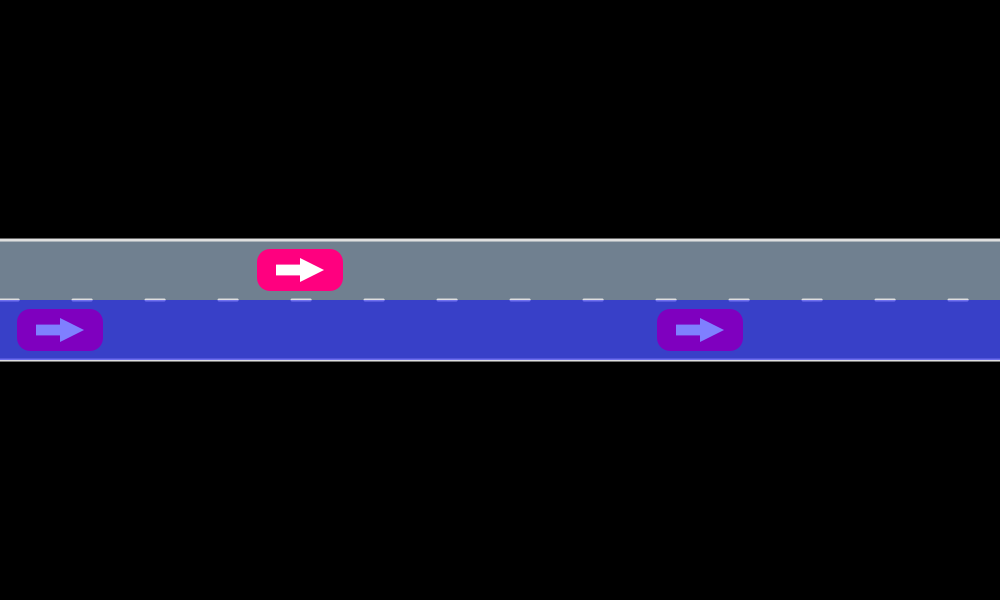

In [9]:
lane_overlay = LaneOverlay(roadway[LaneTag(1,1)], RGBA(0.0,0.0,1.0,0.5))
render(scene, roadway, [lane_overlay], cam=FitToContentCamera(0.))